In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import training and test dataset
train_data = pd.read_csv('trainingdata.txt', sep=";", header=None)
train_data = train_data.rename(columns=train_data.iloc[0]).loc[1:]

test_data = pd.read_csv('testdata.txt', sep=";", header=None)
test_data = test_data.rename(columns=test_data.iloc[0]).loc[1:]

In [35]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
2,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
3,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
4,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
5,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes


In [122]:
# convert data type
convert_dict = {'age': int,
                'balance': int,
                'day': int,
                'duration': int,
                'campaign': int,
                'pdays': int,
                'previous': int,
                }
train_data = train_data.astype(convert_dict)
test_data = test_data.astype(convert_dict)

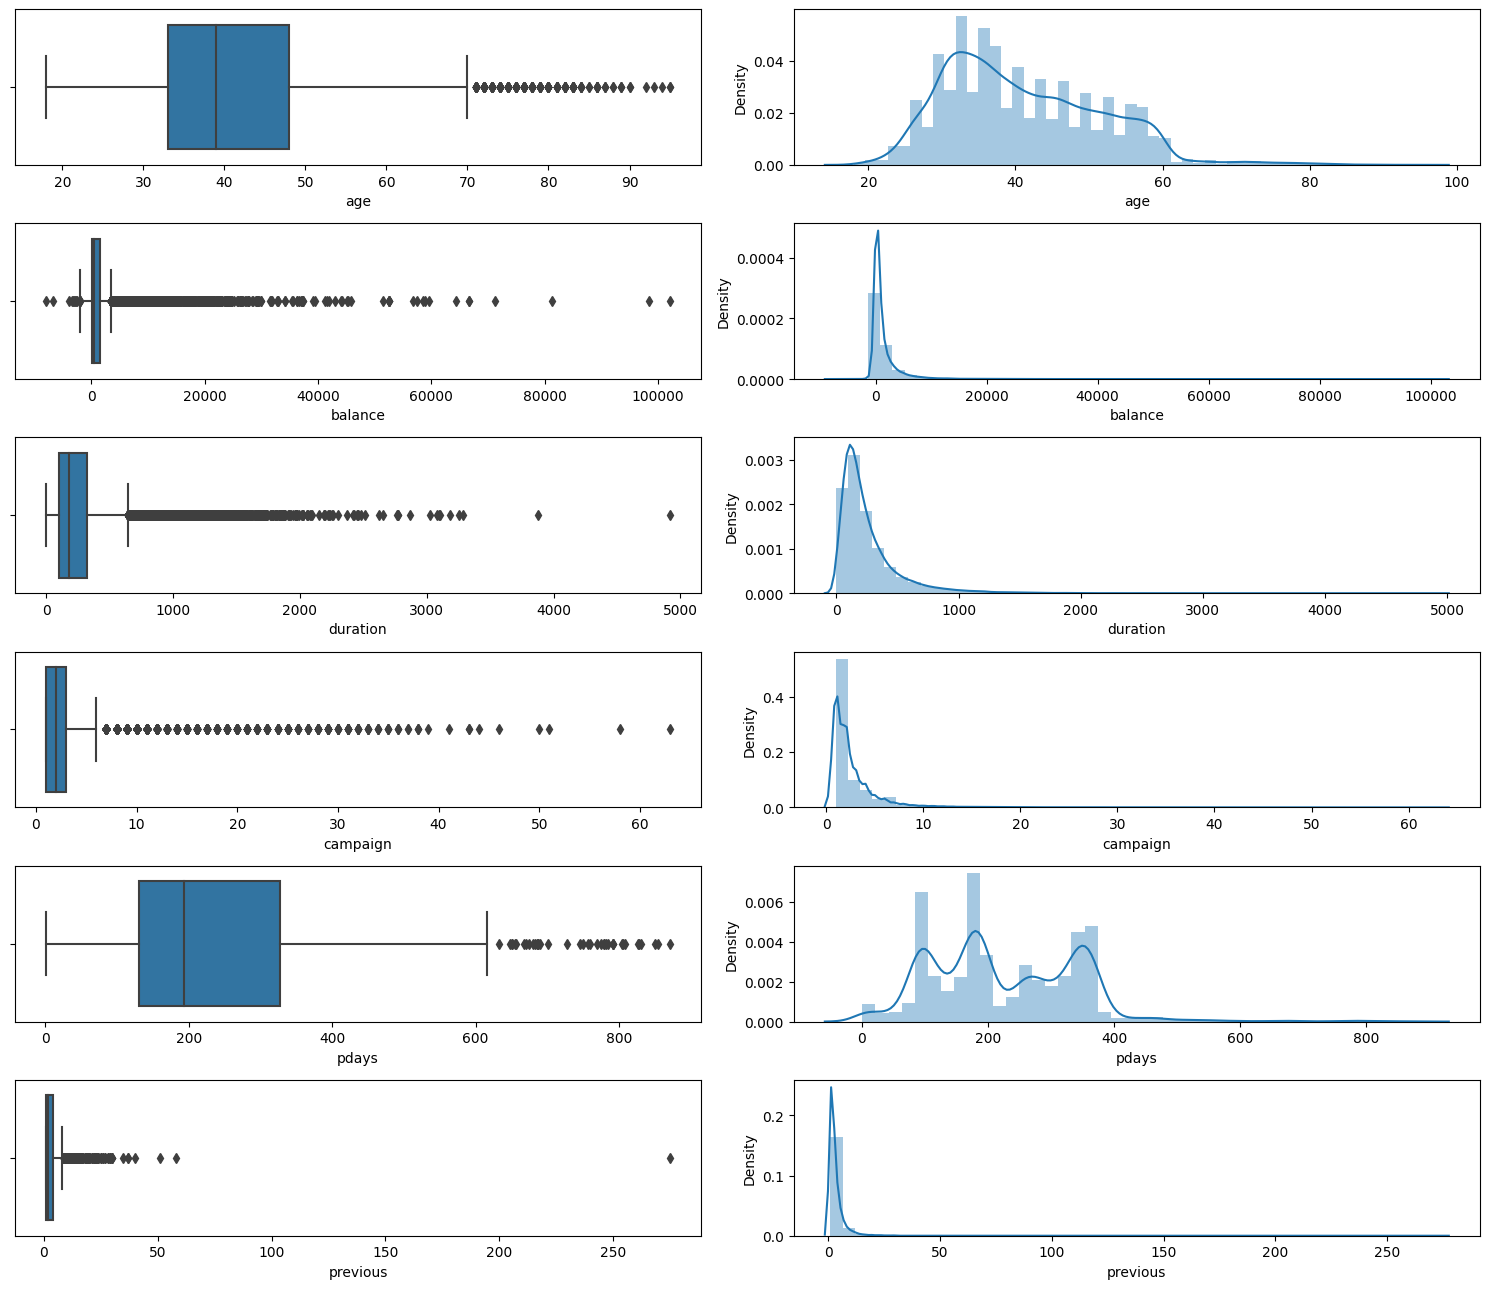

In [58]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= train_data["age"], ax = ax[0,0])
sns.distplot(train_data['age'], ax = ax[0,1])
sns.boxplot(x= train_data["balance"], ax = ax[1,0])
sns.distplot(train_data['balance'], ax = ax[1,1])
sns.boxplot(x= train_data["duration"], ax = ax[2,0])
sns.distplot(train_data['duration'], ax = ax[2,1])
sns.boxplot(x= train_data["campaign"], ax = ax[3,0])
sns.distplot(train_data['campaign'], ax = ax[3,1])
sns.boxplot(x= train_data[train_data['pdays'] >= 0]["pdays"], ax = ax[4,0])
sns.distplot(train_data[train_data['pdays'] >= 0]["pdays"], ax = ax[4,1])
sns.boxplot(x= train_data[train_data['previous'] != 0]["previous"], ax = ax[5,0])
sns.distplot(train_data[train_data['previous'] != 0]["previous"], ax = ax[5,1])
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


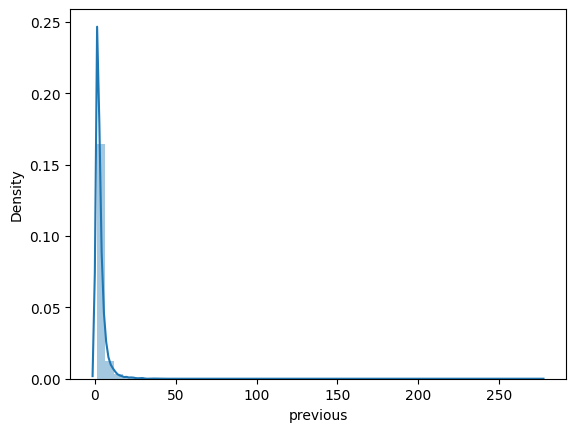

In [53]:
sns_plot = sns.distplot(train_data[train_data['previous'] != 0]["previous"])
plt.show()

In [123]:
# training data pre-processing

# remove columns
train_data = train_data.drop(columns=['age', 'day', 'month', 'contact'])

# binary columns
train_data['default'].replace(['no', 'yes'],[0, 1], inplace=True)
train_data['housing'].replace(['no', 'yes'],[0, 1], inplace=True)
train_data['loan'].replace(['no', 'yes'],[0, 1], inplace=True)
train_data['y'].replace(['no', 'yes'],[0, 1], inplace=True)

# one hot encoding categorical columns
train_data = pd.get_dummies(train_data, columns=['job', 'marital', 'education', 'poutcome'], \
                            prefix=['job', 'marital', 'edu', 'poutcome'])


# remove outliers for balance, duration, and previous columns using absolute z score
train_data = train_data[(np.abs(stats.zscore(train_data.balance)) < 3)]
train_data = train_data[(np.abs(stats.zscore(train_data.duration)) < 3)]
train_data = train_data[(np.abs(stats.zscore(train_data.campaign)) < 3)]
#     df = df[(np.abs(stats.zscore(df.previous)) < 3)]

# # oversampling using SMOTE
# x_train = train_data.drop(columns = ['y'])
# y_train = train_data['y']
# sm = SMOTE()
# x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)
# train_data_oversampled = pd.concat([x_train_oversampled, y_train_oversampled], axis=1)

In [124]:
# test data pre-processing

# remove columns
test_data = test_data.drop(columns=['age', 'day', 'month', 'contact'])

# binary columns
test_data['default'].replace(['no', 'yes'],[0, 1], inplace=True)
test_data['housing'].replace(['no', 'yes'],[0, 1], inplace=True)
test_data['loan'].replace(['no', 'yes'],[0, 1], inplace=True)
test_data['y'].replace(['no', 'yes'],[0, 1], inplace=True)

# one hot encoding categorical columns
test_data = pd.get_dummies(test_data, columns=['job', 'marital', 'education', 'poutcome'], \
                            prefix=['job', 'marital', 'edu', 'poutcome'])

In [126]:
train_data.to_csv('trainingdata_without_oversampling.csv', index = False)
test_data.to_csv('testdata_processed.csv', index = False)

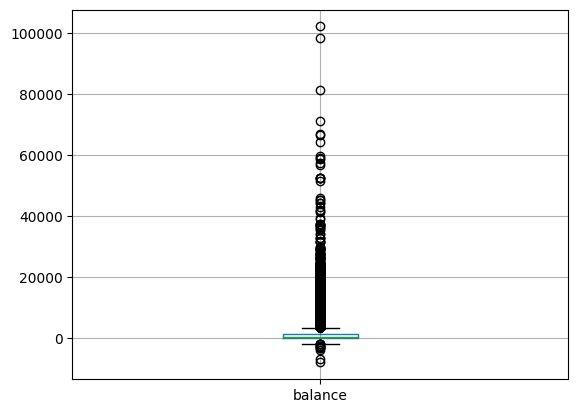

In [10]:
# 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'
boxplot = train_data.boxplot(column=['balance'])
plt.show()

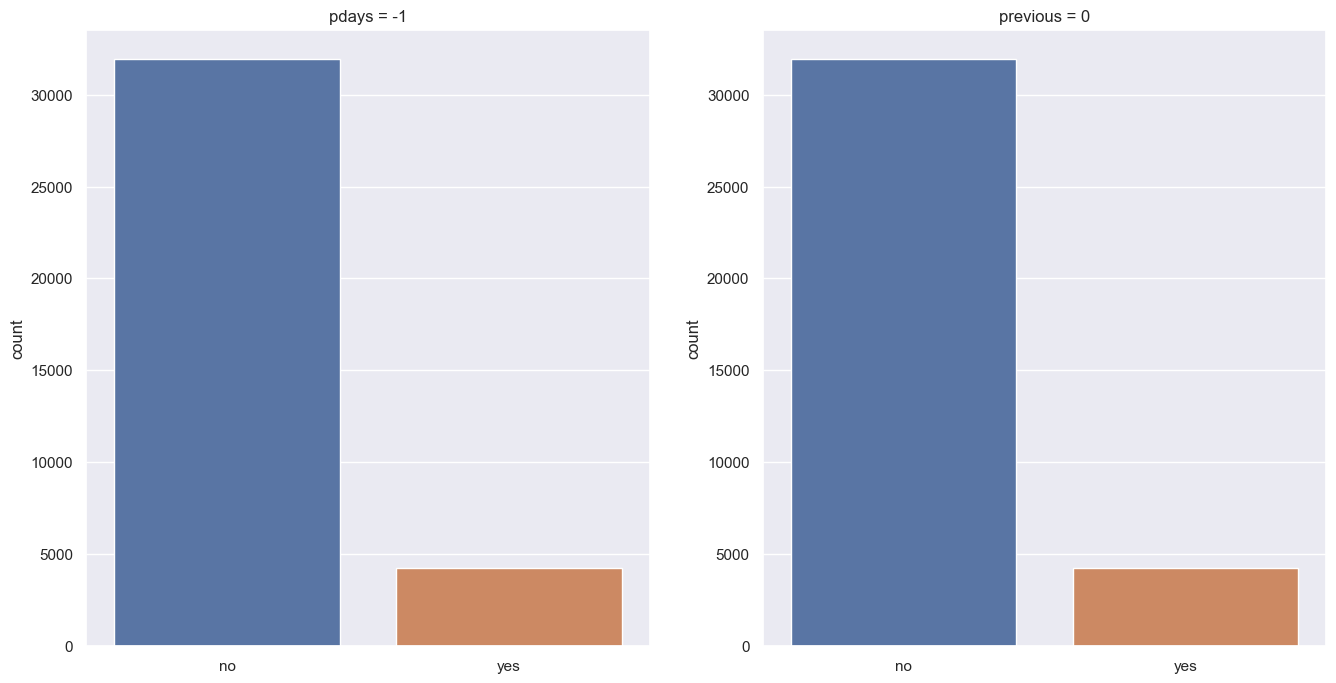

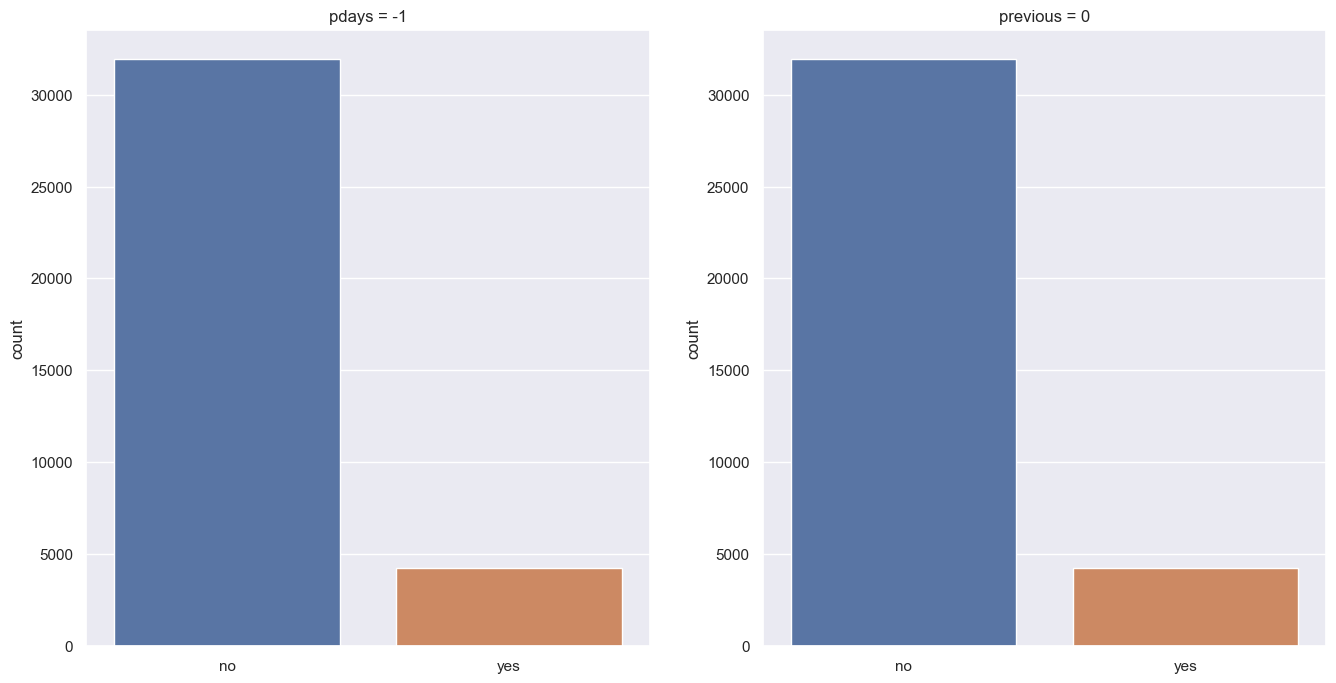

In [64]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(x = train_data.y.values, data=train_data[train_data['pdays'] == -1], ax = ax[0])
sns.countplot(x = train_data.y.values, data=train_data[train_data['previous'] == 0], ax = ax[1])

ax[0].set(title = 'pdays = -1')
ax[1].set(title = 'previous = 0')

plt.show()

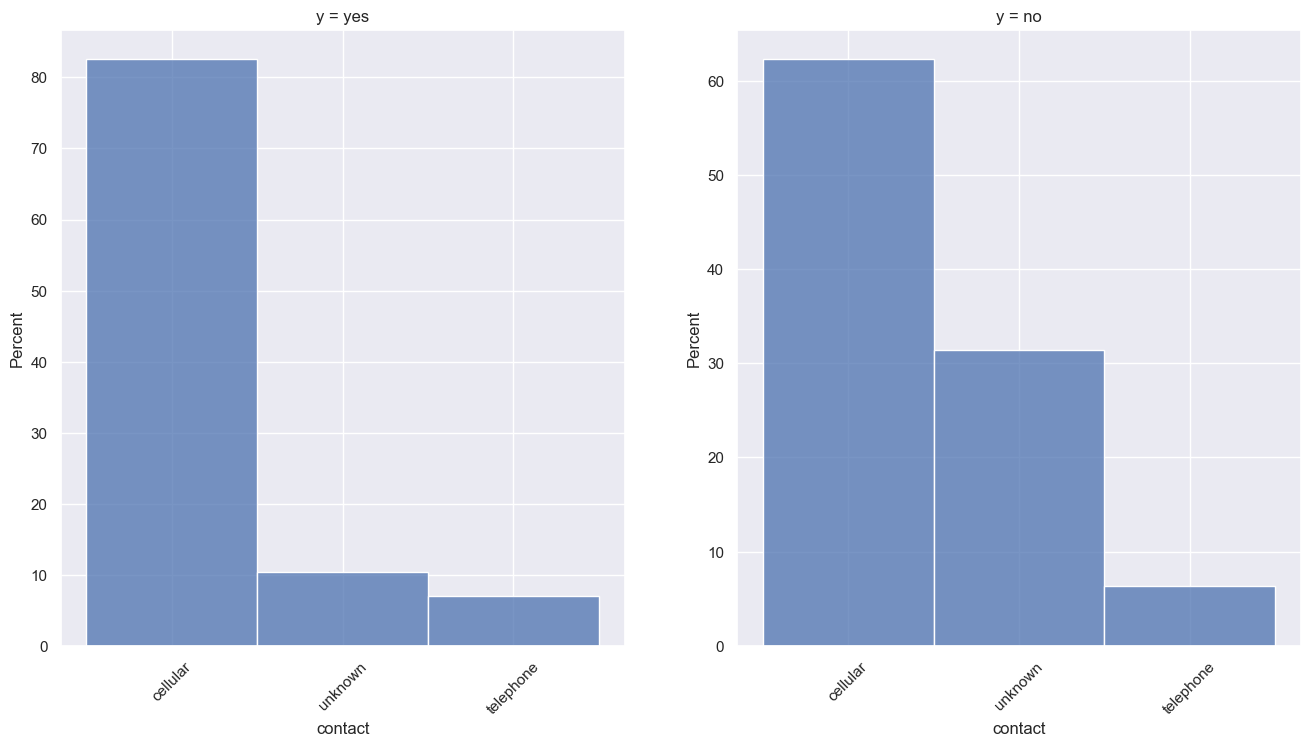

In [107]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(
    x='contact',
    data=train_data[train_data.y == 'yes'],
    ax=ax[0],
    #bins = 30,
    stat='percent'
)

sns.histplot(
    x='contact',
    data=train_data[train_data.y == 'no'],
    ax=ax[1],
    #bins = 30,
    stat='percent'
)
# sns.distplot(train_data[train_data.y == 'yes']['campaign'], ax = ax[0])
# sns.distplot(train_data[train_data.y == 'no']['campaign'], ax = ax[1])
ax[0].set(title = 'y = yes')
ax[1].set(title = 'y = no')

for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)

plt.show()

In [81]:
# remove outliers for balance, duration, and previous columns using absolute z score
train_data = train_data[(np.abs(stats.zscore(train_data.balance)) < 3)]
train_data = train_data[(np.abs(stats.zscore(train_data.duration)) < 3)]
train_data = train_data[(np.abs(stats.zscore(train_data.campaign)) < 3)]

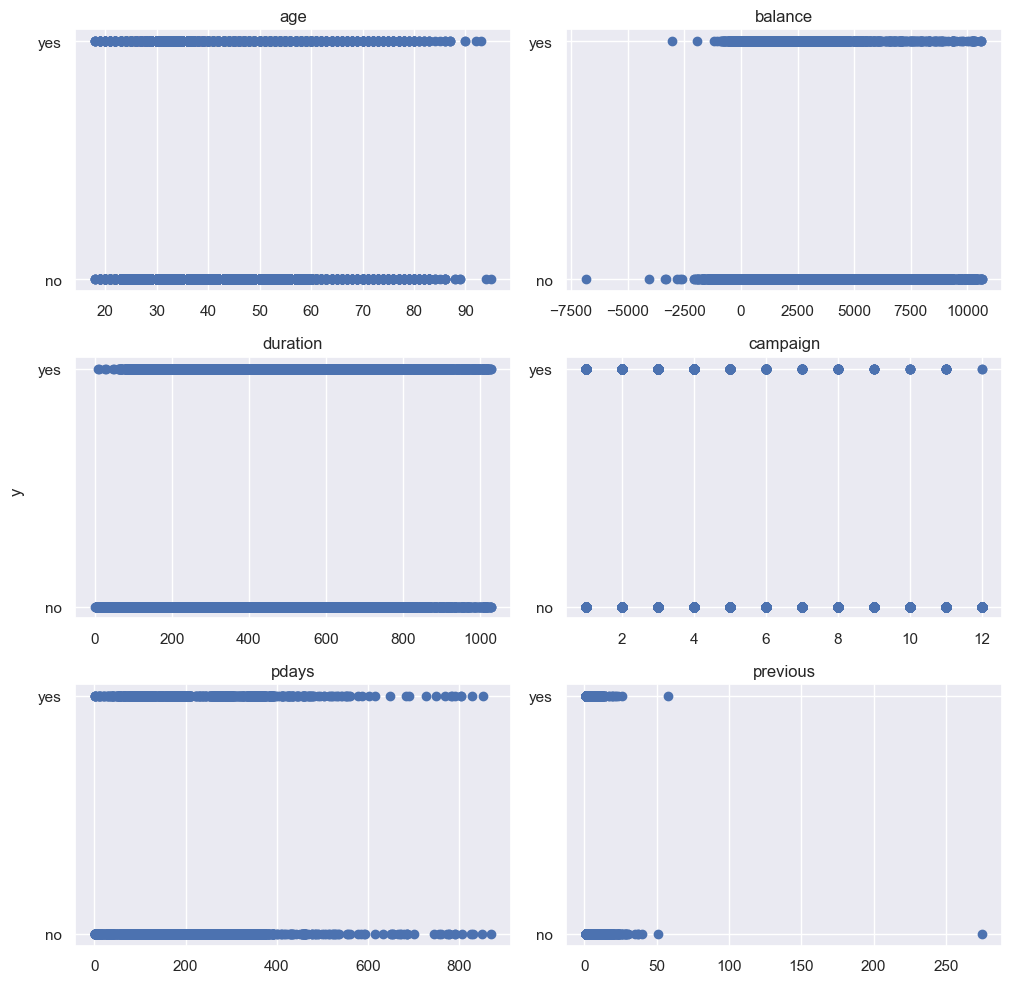

In [70]:
f,axarr = plt.subplots(3,2, figsize=(10,10))
yval = train_data.y.values
axarr[0,0].scatter(train_data.age.values, yval)
axarr[0,0].set_title('age')
axarr[0,1].scatter(train_data.balance.values, yval)
axarr[0,1].set_title('balance')
axarr[1,0].scatter(train_data.duration.values, yval)
axarr[1,0].set_title('duration')
axarr[1,1].scatter(train_data.campaign.values, yval)
axarr[1,1].set_title('campaign')
axarr[2,0].scatter(train_data[train_data['pdays'] >= 0]["pdays"].values, train_data[train_data['pdays'] >= 0]['y'].values)
axarr[2,0].set_title('pdays')
axarr[2,1].scatter(train_data[train_data['previous'] != 0]['previous'].values, train_data[train_data['previous'] != 0]['y'].values)
axarr[2,1].set_title('previous')


f.text(-0.01, 0.5, 'y', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [91]:
train_data[['default', 'housing', 'loan', 'y', 'job', 'marital', 'education',  'contact', 'month', 'poutcome']].head()

,default,housing,loan,y,job,marital,education,contact,month,poutcome
1,no,yes,yes,no,technician,divorced,secondary,cellular,jul,unknown
2,no,yes,no,no,management,married,tertiary,unknown,may,unknown
3,no,yes,no,no,admin.,married,secondary,unknown,jun,unknown
4,no,yes,no,no,admin.,divorced,secondary,unknown,jun,unknown
5,no,no,no,yes,management,single,tertiary,cellular,apr,unknown


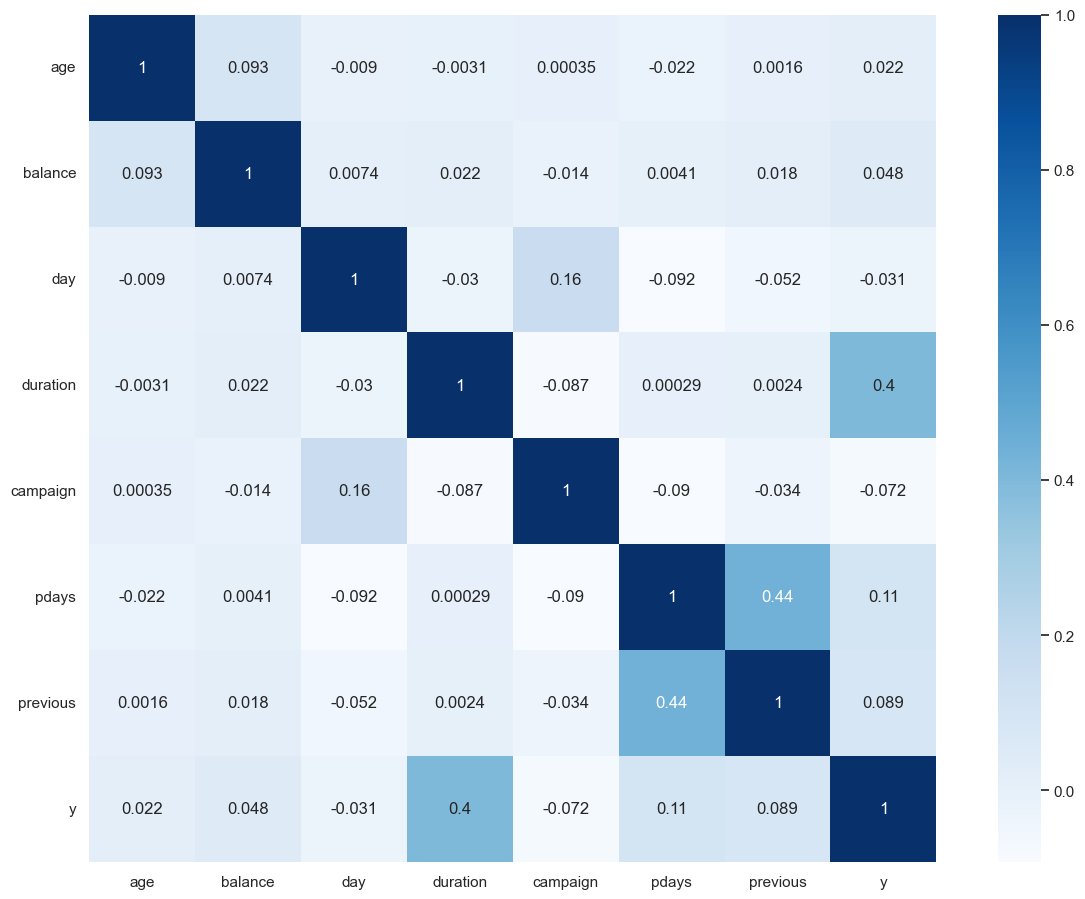

In [87]:
train_data['y'].replace(['no', 'yes'],[0, 1], inplace=True)
fig, ax = plt.subplots(figsize=(16,11))
corr = train_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True, square=True, ax = ax)
plt.yticks(rotation=0)
plt.show()

In [ ]:
sns.displot(data = train_o, x = 'poutcome', hue = train_o['y'])